In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Load the CSV file
file_path = 'Resources/daily_returns_master.csv'  
# Update this path
data = pd.read_csv(file_path)


In [3]:

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort data by date
data = data.sort_values(by='date')


In [4]:

# drop missing daily_return values
data['daily_return'] = data['daily_return'].dropna()



In [8]:
# Filter out SPY and DOW for average calculation
symbols_exclude = ['SPY', 'DOW']
average_symbols = [sym for sym in data['symbol'].unique() if sym not in symbols_exclude]

# Calculate cumulative returns for each symbol
data['cumulative_return'] = (1 + data['daily_return']).cumprod() - 1

# Split data by symbol and store in a dictionary
data_split = {sym: data[data['symbol'] == sym] for sym in data['symbol'].unique()}

# Calculate the average cumulative return for the specified symbols
# Initialize a list to hold data frames for each date
frames = []

for date in data['date'].unique():
    daily_data = data[(data['date'] == date) & (data['symbol'].isin(average_symbols))]
    average_return = daily_data['cumulative_return'].mean()
    frames.append(pd.DataFrame({'date': [date], 'avg_cumulative_return': [average_return]}))

# Concatenate all frames to create the average DataFrame
average_df = pd.concat(frames)
average_df['date'] = pd.to_datetime(average_df['date'])
average_df.sort_values('date', inplace=True)

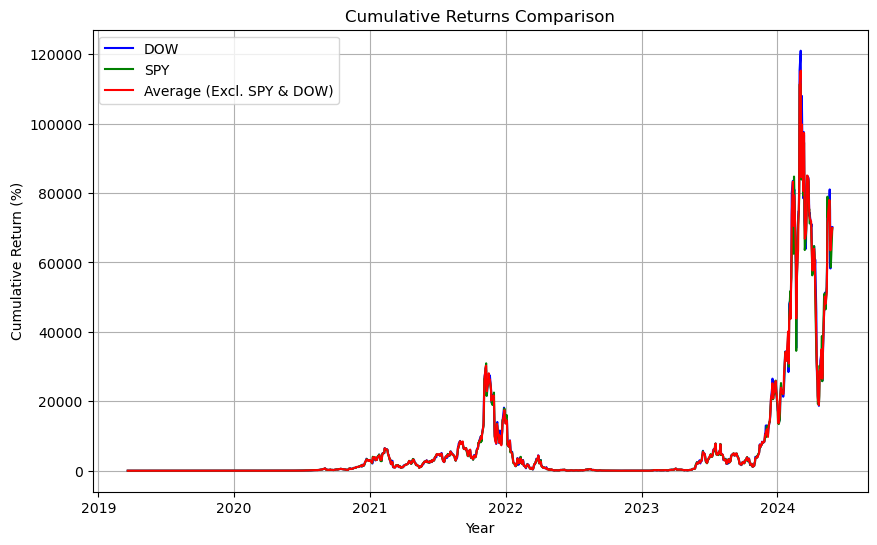

<Figure size 640x480 with 0 Axes>

In [9]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot for DOW
plt.plot(data_split['DOW']['date'], data_split['DOW']['cumulative_return'], label='DOW', color='blue')

# Plot for SPY
plt.plot(data_split['SPY']['date'], data_split['SPY']['cumulative_return'], label='SPY', color='green')

# Plot for average cumulative return of other symbols
plt.plot(average_df['date'], average_df['avg_cumulative_return'], label='Average Cum. return of AI companies', color='red')

plt.xlabel('Year')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns Comparison')
plt.legend()
plt.grid(True)
plt.show()

#save fig before show or else it saves an empty canvas
plt.savefig('Plots/cumulative_returns_all.png')
